In [1]:
import os
import plaidml.keras
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset

In [40]:
train_df=pd.read_csv('MIT-BIH arrythmia dataset with 21 record 5 class sampled dataset using R-peack header=True.csv')

In [41]:
print(train_df['target'].value_counts())

0    8600
3    6773
1    6320
2    6070
4    3985
Name: target, dtype: int64


In [42]:
y_train_=to_categorical(train_df['target'])

In [43]:
X_train_=train_df.iloc[:,:-1].values

In [64]:
X_train_.shape

(31748, 360)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_, y_train_, test_size=0.20, random_state=42)

In [66]:
import numpy as np
# np.random.seed(0)

# import plaidml.keras
# plaidml.keras.install_backend()
# import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"


import pandas as pd
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras import regularizers


In [85]:
dropout_perc = 0.2
l2_reg = 0.01
import keras
keras.backend.clear_session() 

model = Sequential()
model.add(Dropout(dropout_perc, input_shape=(1, 360)))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(dropout_perc))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(dropout_perc))
model.add(Dense(5, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)))
print(model.summary())

INFO:plaidml:Opening device "metal_amd_radeon_pro_5300m.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_11 (Dropout)         (None, 1, 360)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 100)            184400    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 100)            0         
__________

In [86]:
import tensorflow as tf

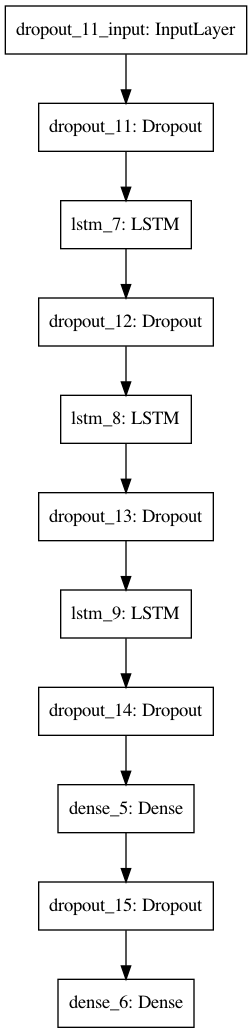

In [87]:
tf.keras.utils.plot_model(
    model
)

In [88]:
!pip install livelossplot

In [89]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [90]:
from livelossplot import PlotLossesKeras


In [91]:
X_train_re = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_valid_re = y_valid.reshape((y_valid.shape[0], 1, y_valid.shape[1]))
X_valid_re = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))
y_train_re = y_train.reshape((y_train.shape[0], 1, y_train.shape[1]))


In [92]:
history_ = None

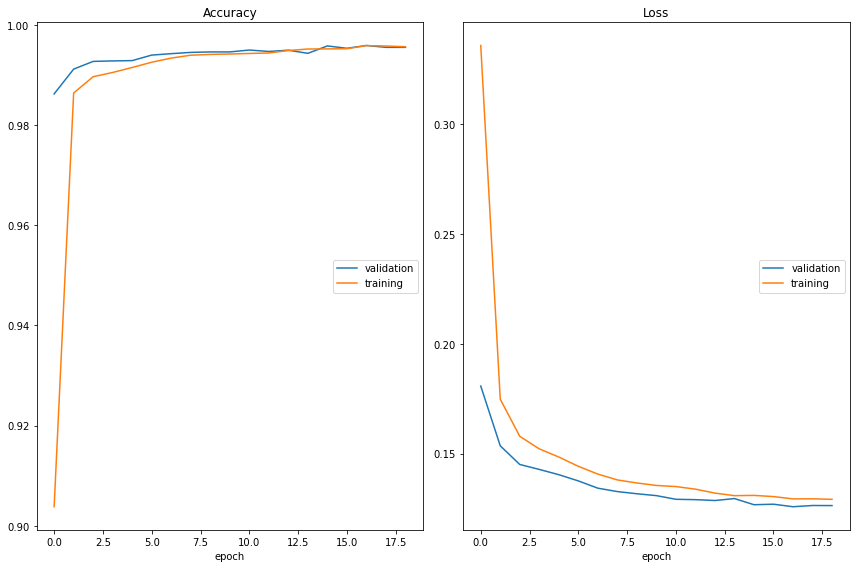

Accuracy
	validation       	 (min:    0.986, max:    0.996, cur:    0.996)
	training         	 (min:    0.904, max:    0.996, cur:    0.996)
Loss
	validation       	 (min:    0.126, max:    0.181, cur:    0.126)
	training         	 (min:    0.129, max:    0.336, cur:    0.129)


In [93]:
history_ = model.fit(
    X_train_re,
    y_train_re,
    validation_data=(X_valid_re, y_valid_re),
    batch_size=64,
    callbacks=[PlotLossesKeras(),tf.keras.callbacks.EarlyStopping(patience=2),],
    epochs=50)

In [96]:
print(history_.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


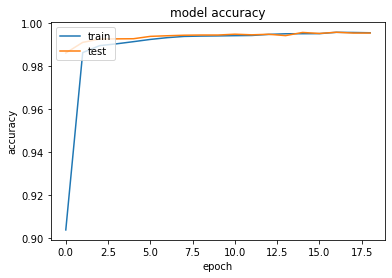

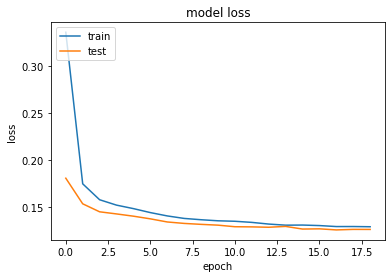

In [99]:
print(history_.history.keys())
# summarize history for accuracy
plt.plot(history_.history['acc'])
plt.plot(history_.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
model.save('LSTM_MODEL_50.h5')

In [101]:
results = model.evaluate(X_train_re, y_train_re, verbose=0)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
results

[0.12084335584496501, 0.9978266013157688]

In [104]:
test = model.predict_classes(X_train_re)

In [106]:
test

array([[1],
       [2],
       [0],
       ...,
       [0],
       [2],
       [3]])